### Preprocessing and Scaling

<img src="images/scaling.png" alt="Drawing" style="width: 700px;"/>

#### Standard Scaler

The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

#### <center>$\dfrac{x_i – mean(x)}{stdev(x)}$</center>
If data is not normally distributed, this is not the best scaler to use.

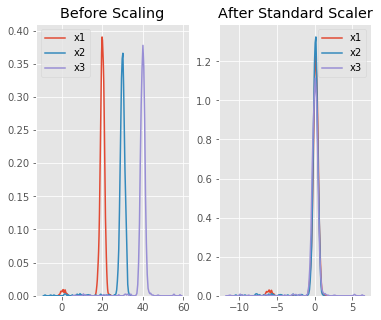

In [139]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)
df = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(10, 10, 25)]),
    'x3': np.concatenate([np.random.normal(40, 1, 1000), np.random.normal(20, 20, 25)])
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

#### Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

#### <center>$\dfrac{x_i – min(x)}{max(x) – min(x)}$</center>
It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

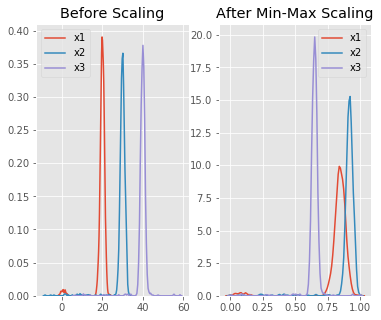

In [140]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

#### Robust Scaler

The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

#### <center>$\dfrac{x_i – Q_1(x)}{Q_3(x) – Q_1(x)}$</center>

For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

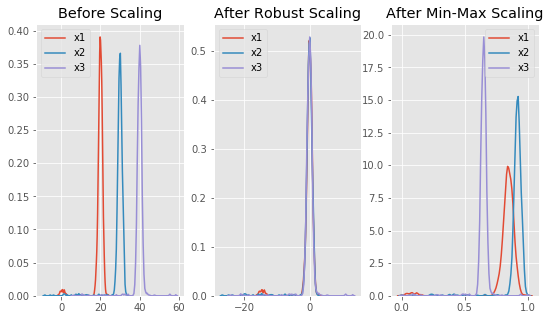

In [141]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2','x3'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
sns.kdeplot(robust_scaled_df['x3'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x3'], ax=ax3)
plt.show()

#### Normalizer
The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

#### <center>$\dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$</center>

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

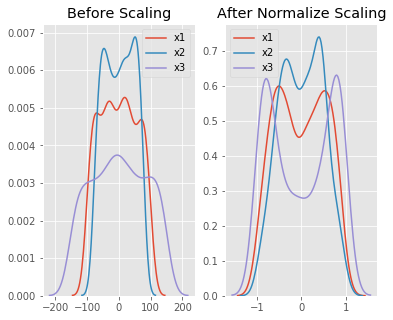

In [142]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'x2': np.random.randint(-80, 80, 1000).astype(float),
    'x3': np.random.randint(-150, 150, 1000).astype(float)
})

scaler = preprocessing.Normalizer()
normal_scaled_df = scaler.fit_transform(df)
normal_scaled_df = pd.DataFrame(normal_scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Normalize Scaling')
sns.kdeplot(normal_scaled_df['x1'], ax=ax2)
sns.kdeplot(normal_scaled_df['x2'], ax=ax2)
sns.kdeplot(normal_scaled_df['x3'], ax=ax2)
plt.show()

In [74]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [75]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

![array](images/anatomyarray.png)

In [78]:
# transform train data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [80]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("transformed shape: {}".format(X_test_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_test.max(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape: (143, 30)
per-feature minimum before scaling:
 [7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling:
 [2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0

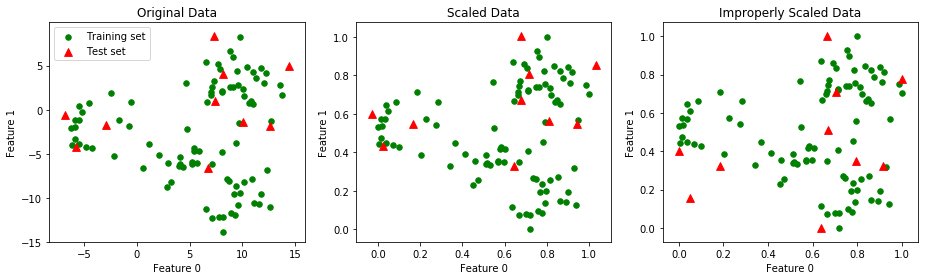

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=100, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],c="g", label="Training set", s=30)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',c="r", label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c="g", label="Training set", s=30)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',c="r", label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c="g", label="training set", s=30)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],marker='^', c="r", label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
#ไม่เหมาะสม

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

In [41]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

svm = SVC(C=10)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.99
